In [7]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [8]:
iris = load_iris()

In [9]:
file = pd.DataFrame(iris.data, columns=iris.feature_names)

In [10]:
target = pd.DataFrame(iris.target)
file['flower_name'] = target.apply(lambda x : iris.target_names[x])
file['target'] = iris.target;

In [11]:
file.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_name,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [12]:
file.drop(['petal length (cm)', 'petal width (cm)'], axis=1, inplace= True)

In [13]:
file.head()

,sepal length (cm),sepal width (cm),flower_name,target
0,5.1,3.5,setosa,0
1,4.9,3.0,setosa,0
2,4.7,3.2,setosa,0
3,4.6,3.1,setosa,0
4,5.0,3.6,setosa,0


In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

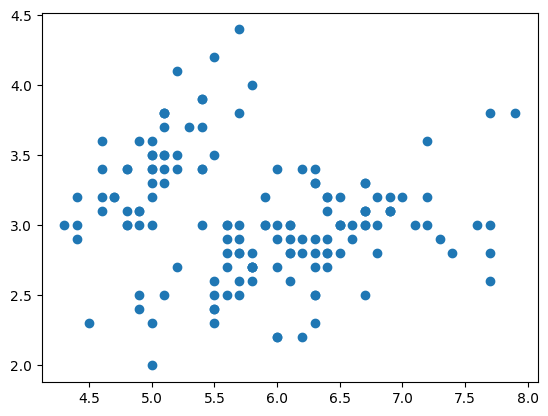

In [16]:
fig, ax = plt.subplots()
ax.scatter(file['sepal length (cm)'], file['sepal width (cm)'])

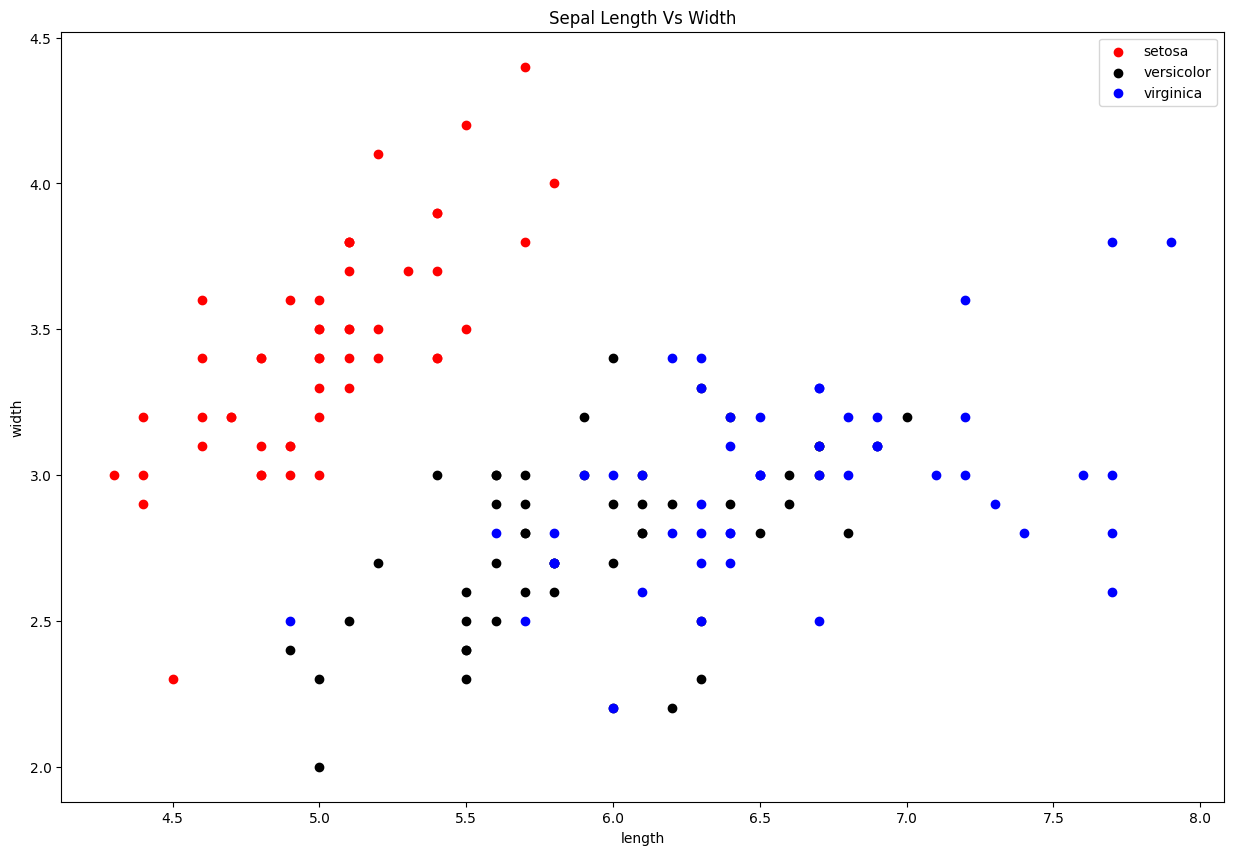

In [24]:
# lets see every flower type with different color
df1 = file[file['target'] == 0]
df2 = file[file['target'] == 1]
df3 = file[file['target'] == 2]

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', label='setosa')
ax.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='black', label='versicolor')
ax.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='blue', label='virginica')
ax.set(
    title='Sepal Length Vs Width', 
    xlabel='length', 
    ylabel='width'
);
plt.legend();

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
# here maximum two groups can be formed from the figure lets see by using the elbow method

In [28]:
from sklearn.cluster import KMeans

mse = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(file[['sepal length (cm)', 'sepal width (cm)']])
    mse.append(km.inertia_)

In [29]:
mse

[130.4752666666667,
 58.20409278906672,
 37.05070212765958,
 28.01114916080846,
 20.95735586730691,
 17.4635095752201,
 14.871073481116586,
 12.806987512455617,
 11.144733193277311,
 9.638851368076375]

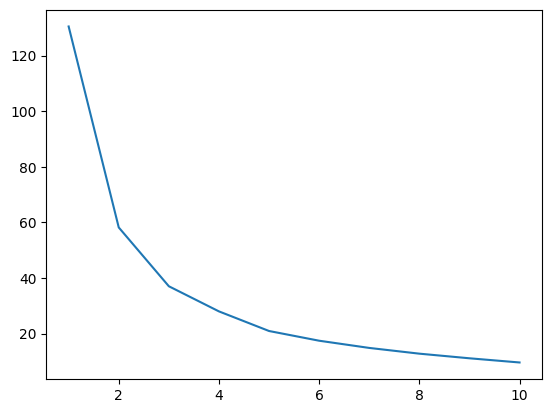

In [30]:
fig, ax = plt.subplots()
ax.plot(k_range, mse)

In [31]:
# lets find the clusters

In [33]:
km = KMeans(n_clusters=3)

cluster_val = km.fit_predict(file[['sepal length (cm)', 'sepal width (cm)']])

In [34]:
file['cluster1'] = cluster_val

In [35]:
file.head()

,sepal length (cm),sepal width (cm),flower_name,target,cluster1
0,5.1,3.5,setosa,0,0
1,4.9,3.0,setosa,0,0
2,4.7,3.2,setosa,0,0
3,4.6,3.1,setosa,0,0
4,5.0,3.6,setosa,0,0


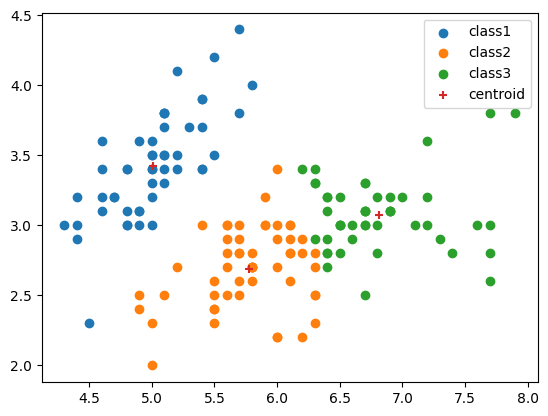

In [41]:
df1 = file[file['cluster1'] == 0]
df2 = file[file['cluster1'] == 1]
df3 = file[file['cluster1'] == 2]

fig, ax = plt.subplots()
ax.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], label='class1')
ax.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], label='class2')
ax.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], label='class3')
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='+', label='centroid')
plt.legend()

In [42]:
# lets try all this after we do some scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

file['sepal length (cm)'] = scaler.fit_transform(file[['sepal length (cm)']])
file['sepal width (cm)'] = scaler.fit_transform(file[['sepal width (cm)']])

In [46]:
file.head()

,sepal length (cm),sepal width (cm),flower_name,target,cluster1
0,0.222222,0.625000,setosa,0,0
1,0.166667,0.416667,setosa,0,0
2,0.111111,0.500000,setosa,0,0
3,0.083333,0.458333,setosa,0,0
4,0.194444,0.666667,setosa,0,0


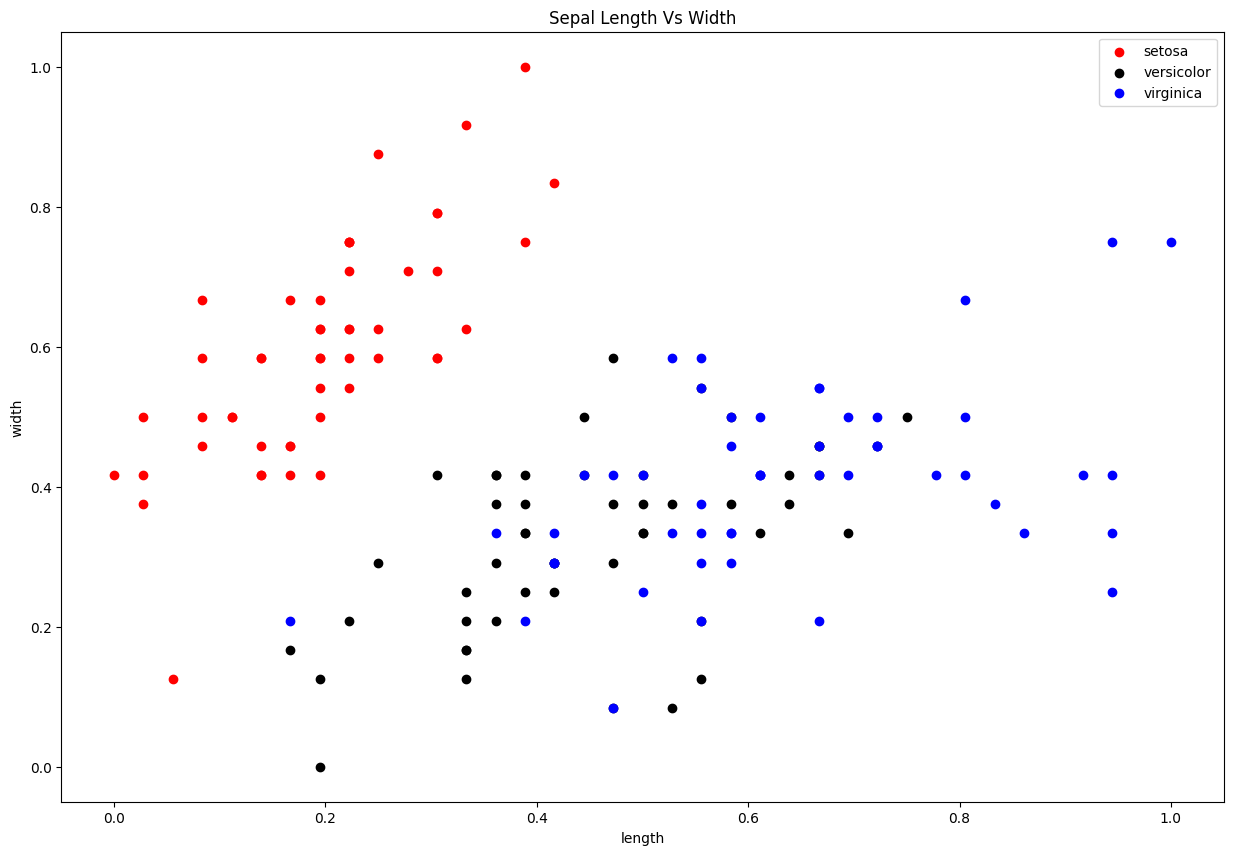

In [47]:
# lets see every flower type with different color
df1 = file[file['target'] == 0]
df2 = file[file['target'] == 1]
df3 = file[file['target'] == 2]

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', label='setosa')
ax.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='black', label='versicolor')
ax.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='blue', label='virginica')
ax.set(
    title='Sepal Length Vs Width', 
    xlabel='length', 
    ylabel='width'
);
plt.legend();

In [48]:
mse = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(file[['sepal length (cm)', 'sepal width (cm)']])
    mse.append(km.inertia_)

In [49]:
mse

[12.797757201646089,
 6.8552905260332775,
 4.115194202754065,
 3.2174838565233785,
 2.5593809748902334,
 2.1000615705604577,
 1.813582659839399,
 1.5329369415611636,
 1.2688256922081356,
 1.1145001923308762]

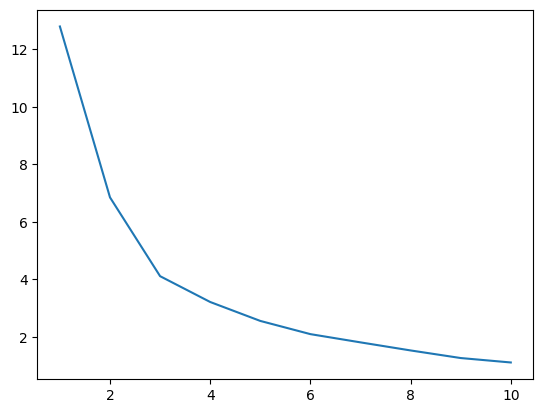

In [50]:
fig, ax = plt.subplots()
ax.plot(k_range, mse)

In [52]:
km = KMeans(n_clusters=3)

file['cluster2'] = km.fit_predict(file[['sepal length (cm)', 'sepal width (cm)']])

In [53]:
file.head()

,sepal length (cm),sepal width (cm),flower_name,target,cluster1,cluster2
0,0.222222,0.625000,setosa,0,0,1
1,0.166667,0.416667,setosa,0,0,1
2,0.111111,0.500000,setosa,0,0,1
3,0.083333,0.458333,setosa,0,0,1
4,0.194444,0.666667,setosa,0,0,1


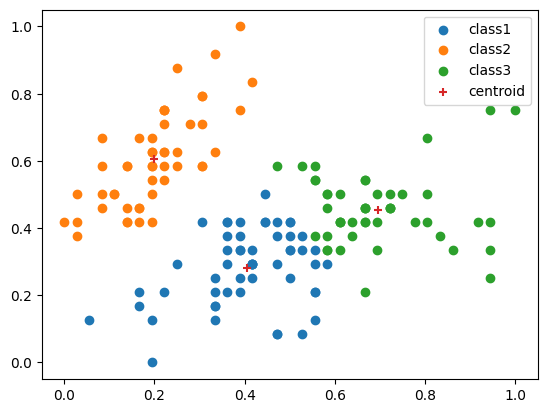

In [54]:
df1 = file[file['cluster2'] == 0]
df2 = file[file['cluster2'] == 1]
df3 = file[file['cluster2'] == 2]

fig, ax = plt.subplots()
ax.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], label='class1')
ax.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], label='class2')
ax.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], label='class3')
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='+', label='centroid')
plt.legend()